In [ ]:
import sys
from pathlib import Path

sys.path.insert(0,str(Path(r'C:\Users\ku51015\CHMURA\mystuff\Graph-Vizualisation-Rating-Metric').resolve()))

from graph_generating_script import *
from graph_metric_script import *
import matplotlib.pyplot as plt
import igraph as ig
import numpy as np
import pickle

In [49]:
# example_posdf = pd.read_csv(r'pos_dfs\0_circular_layout.csv')
# with open('graph_objects\graph_0.pkl', 'rb') as f:
#     G = pickle.load(f)

In [50]:
# zrobic df gdzie jest: graph_id+layout(czyli nazwa pliku), score, i oliczone wartosci kazdego z komponentow

# MAIN LOOP

In [2]:
annotations = pd.read_excel('randoms_BA_annotations_scores.xlsx')

In [3]:
import os 
posdf_dir = 'pos_dfs'
graph_dir = 'graph_objects'


calculated_components_df = pd.DataFrame(columns=['posdf_id', 'score', 'node_distribution', 'distance_to_borderlines', 'edge_length_sum', 'edge_node_distance_contribution', 'count_edge_crossings','communities_closeness', 'sum_of_angles', 'symmetry'])

# Iterate through files in the posdf_dir
for posdf_file in os.listdir(posdf_dir):
    # reading data
    if posdf_file.endswith('.csv'):
        posdf = pd.read_csv(os.path.join(posdf_dir, posdf_file))
        print(f'Loaded {posdf_file}')

    graph_id = posdf_file.split('_')[0]
    layout = posdf_file.split('.')[0]
    layout = layout[2:]
    score = annotations[annotations['graph_id'] == int(graph_id)][layout].values[0]


    graph_file = 'graph_'+graph_id+'.pkl' 
    with open(os.path.join(graph_dir, graph_file), 'rb') as f:
        G = pickle.load(f)
    components_dict = {
        'posdf_id': posdf_file,
        'score': score,
        'node_distribution': node_distribution(posdf),
        'distance_to_borderlines': distance_to_borderlines(posdf),
        'edge_length_sum': edge_length_sum(G, posdf),
        'edge_node_distance_contribution': edge_node_distance_contribution(G, posdf)[0],
        'count_edge_crossings': count_edge_crossings(G, posdf),
        'communities_closeness' : intra_cluster_distance(G, posdf)['overall_sum'],
        'sum_of_angles' : sum_of_angles(G, posdf),
        'symmetry' : measure_graph_symmetry(G, posdf)
    }
    new_row_df = pd.DataFrame([components_dict])
    calculated_components_df = pd.concat([calculated_components_df, new_row_df], ignore_index=True)

Loaded 0_kamada_kawai.csv
Loaded 0_lgl.csv


C:\Users\ku51015\AppData\Local\Temp\1\ipykernel_3852\2505088977.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  calculated_components_df = pd.concat([calculated_components_df, new_row_df], ignore_index=True)


Loaded 0_random_no1.csv
Loaded 0_random_no2.csv
Loaded 0_random_no3.csv
Loaded 0_random_no4.csv
Loaded 0_random_no5.csv
Loaded 1_kamada_kawai.csv
Loaded 1_lgl.csv
Loaded 1_random_no1.csv
Loaded 1_random_no2.csv
Loaded 1_random_no3.csv
Loaded 1_random_no4.csv
Loaded 1_random_no5.csv
Loaded 2_kamada_kawai.csv
Loaded 2_lgl.csv
Loaded 2_random_no1.csv
Loaded 2_random_no2.csv
Loaded 2_random_no3.csv
Loaded 2_random_no4.csv
Loaded 2_random_no5.csv
Loaded 3_kamada_kawai.csv
Loaded 3_lgl.csv
Loaded 3_random_no1.csv
Loaded 3_random_no2.csv
Loaded 3_random_no3.csv
Loaded 3_random_no4.csv
Loaded 3_random_no5.csv
Loaded 4_kamada_kawai.csv
Loaded 4_lgl.csv
Loaded 4_random_no1.csv
Loaded 4_random_no2.csv
Loaded 4_random_no3.csv
Loaded 4_random_no4.csv
Loaded 4_random_no5.csv
Loaded 5_kamada_kawai.csv
Loaded 5_lgl.csv
Loaded 5_random_no1.csv
Loaded 5_random_no2.csv
Loaded 5_random_no3.csv
Loaded 5_random_no4.csv
Loaded 5_random_no5.csv
Loaded 6_kamada_kawai.csv
Loaded 6_lgl.csv
Loaded 6_random_no1.cs

In [4]:
calculated_components_df.head(10)

,posdf_id,score,node_distribution,distance_to_borderlines,edge_length_sum,edge_node_distance_contribution,count_edge_crossings,communities_closeness,sum_of_angles,symmetry
0,0_kamada_kawai.csv,7,33.869086,10029.257,1.086856e+01,1.952141e+02,4,1.217502e+01,13.778389,9.308271e-01
1,0_lgl.csv,1,0.180194,0.000,1.838409e+13,1.804812e+02,8,1.063366e+07,13.114532,2.186651e-11
2,0_random_no1.csv,4,444.717155,214.140,5.547612e+00,4.104494e+06,11,5.590635e+00,12.406287,9.721120e-01
3,0_random_no2.csv,3,286.091528,528.107,4.146000e+00,1.662479e+04,15,6.115485e+00,13.799697,9.844108e-01
4,0_random_no3.csv,6,124.289782,700.560,5.695384e+00,8.184974e+03,12,6.765630e+00,13.702091,9.937203e-01
5,0_random_no4.csv,5,165.227188,4302.544,6.079889e+00,8.797411e+04,16,6.951905e+00,13.635595,9.806170e-01
6,0_random_no5.csv,2,399.078771,154.647,5.857241e+00,3.025751e+04,13,6.765539e+00,11.894773,9.882454e-01
7,1_kamada_kawai.csv,7,109.461824,10018.634,1.142203e+01,2.951901e+03,23,1.847556e+01,38.756488,9.369952e-01
8,1_lgl.csv,1,2.440336,0.000,3.068267e+13,1.492177e+02,25,1.309975e+07,36.644331,1.694139e-11
9,1_random_no1.csv,3,760.664663,227.109,7.768611e+00,8.010258e+05,40,1.178481e+01,34.332928,9.762055e-01


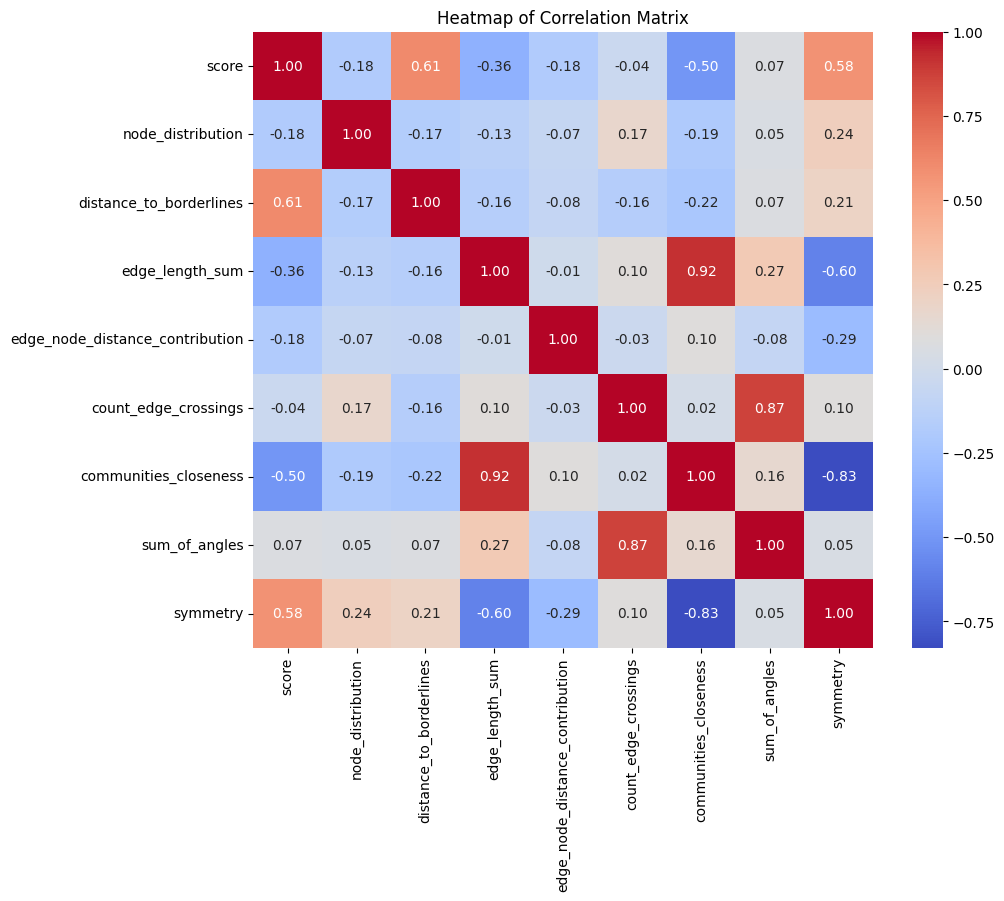

In [7]:
# Calculate the correlation matrix
import seaborn as sns

#! todo check if the results werent better for only first 6 graphs
calculated_components_df_numeric = calculated_components_df.drop(columns=['posdf_id'])
correlation_matrix = calculated_components_df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()